In [25]:
#3b.Tune the learning rate,no.of epoch and even data preparation method to get an improved score on the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#
# Import Keras modules
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPClassifier # neural network

In [26]:
# Load the iris dataset


# Load the data set and see first 5 rows
a = pd.read_csv('iris.csv')
iris = pd.DataFrame(a)
iris.head()



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [27]:
iris.shape

(149, 5)

In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [30]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [31]:
clf.fit(X_train, y_train)

D:\Users\sf41\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [32]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 1 2 1 1 2 1 2 0 1 2 0 1 0 1 2 2 1 2 2 0 1 2 2 2 1 2 1 2 1 0 1 1 2 2 1
 0 0 1 2 2 1 0 0]


In [33]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.8


In [34]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [35]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(4,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [36]:
learning_rate=0.04
sgd=SGD(learning_rate)
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
H=network.fit(X_train, train_labels, epochs=100, batch_size=10,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 28ms/step - loss: 1.0153 - accuracy: 0.5357 - val_loss: 0.9436 - val_accuracy: 0.6190
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8448 - accuracy: 0.7619 - val_loss: 0.7199 - val_accuracy: 0.9048
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7435 - accuracy: 0.7619 - val_loss: 0.6699 - val_accuracy: 0.7143
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6905 - val_loss: 0.5763 - val_accuracy: 0.9048
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.8214 - val_loss: 0.5194 - val_accuracy: 0.7619
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7857 - val_loss: 0.4579 - val_accuracy: 0.9524
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.8929 - val_loss: 0.4353 - val_accuracy: 0.9048
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9643 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.9167 - val_loss: 0.4229 - val_accuracy: 0.7619
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.8929 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1661 - accuracy: 0.9643 - val_loss: 0.5213 - val_accuracy: 0.8095
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.8929 - val_loss: 0.2346 - val_accuracy: 0.9048
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.9286 - val_loss: 0.2082 - val_accuracy: 0.9048
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9524 - val_loss: 0.0920 - val_accuracy: 0.9524
Epoch 66/100
9/9 [===============

In [38]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

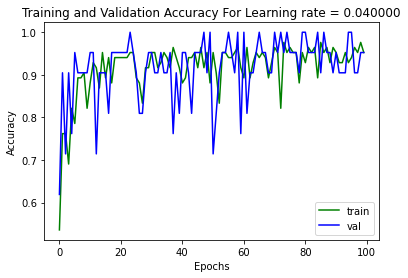

In [39]:
Acc_train = H.history['accuracy']
Accu_val = H.history['val_accuracy']
plt.plot(Acc_train, 'g', label='Training accuracy')
plt.plot(Accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy For Learning rate = %f' % learning_rate)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

In [46]:
test_loss04, test_acc04 = network.evaluate(X_test, test_labels)
train_loss04, train_acc04 = network.evaluate(X_train, train_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc04, '\nTest Loss: ', test_loss04)
print('Train Accuracy: ', train_acc04, '\nTrain Loss: ', train_loss04)

4/4 [==============================] - 0s 997us/step - loss: 0.0823 - accuracy: 0.9810
Test Accuracy:  0.9777777791023254 
Test Loss:  0.06322108209133148
Train Accuracy:  0.9809523820877075 
Train Loss:  0.08233604580163956


In [47]:
learning_rate=0.01
sgd=SGD(learning_rate)
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [48]:
H=network.fit(X_train, train_labels, epochs=100, batch_size=10,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 30ms/step - loss: 0.1068 - accuracy: 0.9643 - val_loss: 0.0988 - val_accuracy: 0.9524
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0905 - accuracy: 0.9762 - val_loss: 0.0908 - val_accuracy: 0.9524
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9762 - val_loss: 0.0526 - val_accuracy: 0.9524
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.9762 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9762 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9405 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 0.1111 - accuracy: 0.9762 - val_loss: 0.0556 - val_accuracy: 0.9524
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9643 - val_loss: 0.0612 - val_accuracy: 0.9524
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9524 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9643 - val_loss: 0.1873 - val_accuracy: 0.9048
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.9405 - val_loss: 0.0969 - val_accuracy: 0.9524
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9524 - val_loss: 0.1243 - val_accuracy: 0.9048
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9405 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 66/100
9/9 [===============

In [49]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

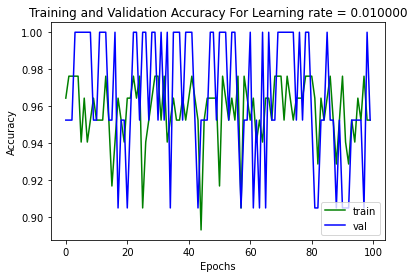

In [50]:
Acc_train = H.history['accuracy']
Accu_val = H.history['val_accuracy']
plt.plot(Acc_train, 'g', label='Training accuracy')
plt.plot(Accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy For Learning rate = %f' % learning_rate)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

In [51]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
train_loss, train_acc = network.evaluate(X_train, train_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)
print('Train Accuracy: ', train_acc, '\nTrain Loss: ', train_loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9619
Test Accuracy:  0.9777777791023254 
Test Loss:  0.07398846000432968
Train Accuracy:  0.961904764175415 
Train Loss:  0.10671845078468323


In [53]:
print('Learning Rate\t', 'Train Accuracy\t', 'Train Loss\t', 'Test Accuracy\t', 'Test Loss\n')
print('\n', 0.04, '\t', train_acc04, '\t', train_loss04, '\t', test_acc04, '\t', test_loss04)
print('\n', 0.01, '\t', train_acc, '\t', train_loss, '\t', test_acc, '\t', test_loss)

Learning Rate	 Train Accuracy	 Train Loss	 Test Accuracy	 Test Loss


 0.04 	 0.9809523820877075 	 0.08233604580163956 	 0.9777777791023254 	 0.06322108209133148

 0.01 	 0.961904764175415 	 0.10671845078468323 	 0.9777777791023254 	 0.07398846000432968
